In [1]:
import cv2
import os
import re
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Tuple

In [2]:
class Bounds:
    def __init__(self, left: int, right: int, bottom: int, top: int):
        if left < right and bottom < top:
            self.left = left
            self.right = right
            self.top = top
            self.bottom = bottom
        else:
            raise Exception("Wrong bound parameters.")

In [3]:
def get_brightness_value(img, pixels_bounds: Bounds) -> float:
    black_white_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    required_pixels: np.array = black_white_img[pixels_bounds.bottom : pixels_bounds.top, pixels_bounds.left : pixels_bounds.right]
    h, w = required_pixels.shape
    return required_pixels.sum() / (h * w)

In [4]:
def get_folder_content_brightness(folder_name: str, bounds: Bounds) -> List[Tuple[int, float]]:
    brightness_list: List[Tuple[int, float]] = []
    for file_name in os.listdir(folder_name):
        print(f"Starting process {file_name}.")
        ev_value: int = int(re.search("(\+|-)\d+", file_name).group(0))
        image = cv2.imread(os.path.join(folder_name, file_name))
        brightness: float = get_brightness_value(image, bounds)
        brightness_list.append((ev_value, brightness))
    return sorted(brightness_list, key=lambda x: x[0])

In [5]:
def draw_plot(dir_name: str, bounds: Bounds, output_dir: str, title: str):
    brightness_list: List[Tuple[int, float]] = get_folder_content_brightness(dir_name, bounds)
    ev_list, brightnesses = [list(t) for t in zip(*brightness_list)]
    plt.plot(ev_list, np.log10(brightnesses))
    plt.scatter(ev_list, np.log10(brightnesses), color='green')
    plt.title(title)
    plt.xlabel('EV values')
    plt.ylabel('AVG brightness')
    plt.savefig(os.path.join(output_dir, f"{dir_name}.jpg"))

In [6]:
first_bounds: Bounds = Bounds(1984, 2048, 1480, 1544)
second_bounds: Bounds = Bounds(1468, 1532, 1968, 2032)
firs_directory_name: str = "samsung"
second_directory_name: str = "honor"
output_dir: str = "output"

Starting process ev+4.jpg.
Starting process ev-0.jpg.
Starting process ev+2.jpg.
Starting process ev-3.jpg.
Starting process ev-2.jpg.
Starting process ev+3.jpg.
Starting process ev-1.jpg.
Starting process ev-4.jpg.
Starting process ev+1.jpg.


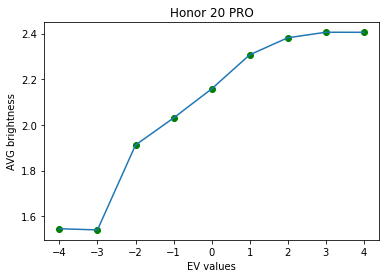

In [7]:
draw_plot(second_directory_name, second_bounds, output_dir, "Honor 20 PRO")

Starting process ev+5.jpg.
Starting process ev-9.jpg.
Starting process ev+6.jpg.
Starting process ev+4.jpg.
Starting process ev-0.jpg.
Starting process ev-8.jpg.
Starting process ev+2.jpg.
Starting process ev+10.jpg.
Starting process ev-3.jpg.
Starting process ev+9.jpg.
Starting process ev+7.jpg.
Starting process ev+8.jpg.
Starting process ev-2.jpg.
Starting process ev+3.jpg.
Starting process ev-5.jpg.
Starting process ev-10.jpg.
Starting process ev-1.jpg.
Starting process ev-6.jpg.
Starting process ev-4.jpg.
Starting process ev-7.jpg.
Starting process ev+1.jpg.


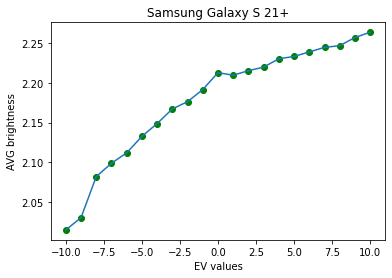

In [8]:
draw_plot(firs_directory_name, second_bounds, output_dir, "Samsung Galaxy S 21+")